# Matemática Computacional - Trabalho 1

## Equipe:
* Henricky de  Lima Monteiro - 475075
* João Almir da Costa Junior - 470034
* 



In [1]:
#base imports
import numpy as np
import matplotlib.pyplot as plt

------------------------
### Q1) Implementar:
#### a) Eliminação de Gauss

Inicialmente vamos escrever a substituição retroativa para testar o método de Gauss.

In [2]:
# Substituição Retroativa
"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""
def sretro(A):
    nC = len(A[0])
    nEq = nC-1
    b = [row[nC-1] for row in A]
    x = np.zeros(nEq)
    for i in range(nEq,0,-1):
        I = i-1
        x[I]=b[I]
        sumRes = 0
        #aux = "x[{0}] = b[{0}] - (".format(I)
        for j in range(i,nEq):
         #   aux += "A[{0}][{1}]*x[{1}]".format(I,j)
            sumRes = sumRes + A[I][j]*x[j]
        #aux += ') / A[{0}][{0}]'.format(I)
        #print(aux)
        if(A[I][I] != 0):
            x[I] = (x[I]-sumRes)/A[I][I]
        elif(x[I]-sumRes != 0):
            raise Exception("Impossible system")
        else:
            raise Exception("Indeterminate system")
    return x

Agora vamos implementar a eliminação de gauss da forma simples, sem pivoteamento.

In [3]:

"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""
def gauss(A):
    nL= len(A)
    nC = len(A[0])
    nEq = nC-1
    posPivo=0
    for i in range(0,nEq-1):
        pivo = A[i][i]
        posPivo=i
        # calc multiples
        m = np.zeros(nL)
        for k in range(i+1,nL):
#            print('m[{0}] = - A[{0}][{1}]/A[{0}][{0}]'.format(k,0),"= -{0}/{1}".format(A[k][0],pivo))
            m[k] = - A[k][posPivo]/pivo
        # Operações
        for j in range(posPivo+1,nL):
            #print('L({0})={1}, m({0})={2}'.format(j,A[j],m[j]))
            A[j] = m[j]*A[posPivo]+A[j]
    return A

#### b) Métodos de Jacobi e Gauss-Seidel

In [4]:
def ajustePivoteamento(A):
    for i in range(len(A)):
        pivo = A[i][i]
        col = [row[i] for row in A]
        if( pivo < 1 and pivo >-1):
            indexMax = col.index(max(col))
            A[[i,indexMax]] = A[[indexMax,i]]
    return A
    
A = np.array([[0,2,3],[4,0.1,6],[7,8,-0.9]])
print(A)
res=ajustePivoteamento(A)
print(res)


[[ 0.   2.   3. ]
 [ 4.   0.1  6. ]
 [ 7.   8.  -0.9]]
[[ 4.   0.1  6. ]
 [ 7.   8.  -0.9]
 [ 0.   2.   3. ]]


##### b.1) Método de Jacobi

Para este método, foi necessário criar uma função ```EqGeral``` que cria uma matriz com os operadores para a equação geral que nos leva para o proximo passo da interação.

In [5]:

def EqGeral(A):
    nL= len(A)
    nC = len(A[0])
    nEq = nC-1
    eG = []
    b = np.zeros(3)
    
    for i in range(nL):
        aux = []
        for j in range(nC):
            if(i==j):
                aux.append(None)         
            elif(j == nC-1):
                continue
            else:
                aux.append(A[i][j]*-1)    
        eG.append(aux.copy())
        aux.clear()

    return np.array(eG)

EqGeral(np.loadtxt("ex_jacobi.txt"))

    

array([[None, 1.0],
       [-1.0, None]], dtype=object)

In [6]:
# Método de Jacobi
"""
A - matriz extendida
nEq - ordem da matriz
nL - num linhas
nC - num colunas
x - solução
"""


def Jacobi(A,E,k=0, maxK=15, X0=None):
    nL= len(A)
    nC = len(A[0])
    #get b's - independentes
    b = [row[nC-1] for row in A]
    #divisores
    div = A.diagonal()
    #definindo x0 - solução
    Xa = np.zeros(nC-1) #X_anterior - X0
    #define a solução
    X = np.zeros(nC-1) 
    if(X0.any()):
        for i in range(len(b)):
            Xa[i]= b[i]/div[i]
    else:
        Xa = X0
    #pega a equação geral
    EG = EqGeral(A)
    #Aplicando
    # print('#',max(X-Xa))
    for i in range(nL):
        soma = b[i]
        for j in range(nC-1):
            termo = EG[i][j]
            if(termo != None):
                xj = Xa[j]
                soma += xj*termo
        X[i] = soma/div[i]
    # print('X',X)
    while(max(X-Xa) > E ):
        Xa = X
        X = np.zeros(nC-1) 
        k=k+1
        if(k> maxK):
            break
        for i in range(nL):
            soma = b[i]
            for j in range(nC-1):
                termo = EG[i][j]
                if(termo != None):
                    xj = Xa[j]
                    soma += xj*termo
            X[i] = soma/div[i]
        print('->E:',max(X-Xa))
        print('X',X, 'k: ', k)


    print('>>>E:',max(X-Xa))
        
    
    return X

Jacobi(np.loadtxt("ex_jacobi.txt"),-10,X0=np.array([0,0]))

->E: 0.75
X [1.25 1.25] k:  1
->E: -0.125
X [1.125 0.875] k:  2
->E: 0.0625
X [0.9375 0.9375] k:  3
->E: 0.09375
X [0.96875 1.03125] k:  4
->E: 0.046875
X [1.015625 1.015625] k:  5
->E: -0.0078125
X [1.0078125 0.9921875] k:  6
->E: 0.00390625
X [0.99609375 0.99609375] k:  7
->E: 0.005859375
X [0.99804688 1.00195312] k:  8
->E: 0.0029296875
X [1.00097656 1.00097656] k:  9
->E: -0.00048828125
X [1.00048828 0.99951172] k:  10
->E: 0.000244140625
X [0.99975586 0.99975586] k:  11
->E: 0.0003662109375
X [0.99987793 1.00012207] k:  12
->E: 0.00018310546875
X [1.00006104 1.00006104] k:  13
->E: -3.0517578125e-05
X [1.00003052 0.99996948] k:  14
->E: 1.52587890625e-05
X [0.99998474 0.99998474] k:  15
>>>E: -0.9999847412109375


array([0., 0.])

##### b.2) Método de Gauss-Seidel


[0 1 2 3 4 5 6 7 8 9] [ 0  1  4  9 16 25 36 49 64 81]


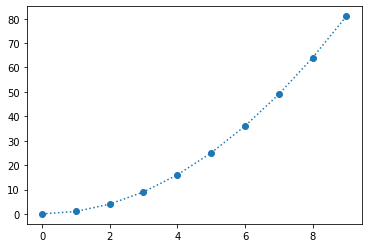

In [7]:
def draw(f):
    x = np.arange(0,10)
    y = f(x)
    print(x,y)

    plt.plot(x,y,'o:')
    plt.show()


draw(lambda x: x**2)

### 3) Implementar

#### a) Método da bisecção

In [8]:
def biseccao(a,b,F,E):
    
    aa = a 
    bb = b #usados para recuperar o a e b antigos na ultima iteração

    xk = 0 #media entre a e b
    fxk = 0 #função com xk como entrada
    dif = 0 #diferenca entre a e b
    iter = 0 #qtd de iteracoes

    xk = (a+b)/2
    fxk= F(xk)
    dif = abs(a-b) 


    if((xk+b)/2)*fxk < 0:
        a = xk
    else:
        b = xk
    

    while(abs(fxk) > E and abs(dif) > E ):
        aa = a
        bb = b

        iter = iter + 1        
        xk = (a+b)/2
        fxk= F(xk)
        dif = abs(a-b) 

        

        if((xk+b)/2)*fxk < 0:
            a = xk
        else:
            b = xk

    print("iter", iter)
    print("a", aa)
    print("b", bb)        
    print("xk:", xk)
    print("fxk", fxk)
    print("dif", dif,"\n")    
    
biseccao(-1,0.5,lambda x:2*x**3 -4*x**2 + 3*x,0.001) 

iter 10
a -0.0009765625
b 0.00048828125
xk: -0.000244140625
fxk -0.000732660322682932
dif 0.00146484375 



#### b) Método da posição falsa

iter 19
a0: -1 , b0:  0.5
a: -1 , b:  0.00026632909299202276
xk: 0.00026632909299202276
fxk 0.0007987035920150492
dif 1.000399440455264 



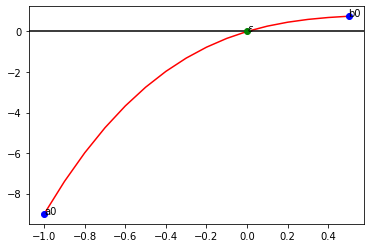

iter 4
a0: -1 , b0:  -0.1
a: -1 , b:  -0.8764230304582485
xk: -0.8764230304582485
fxk -0.0003375545196749874
dif 0.1255326637361358 



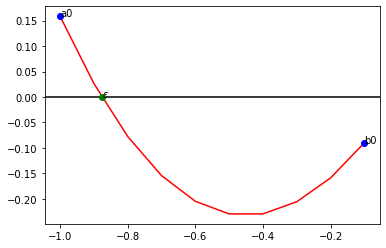

iter 2
a0: 1.4 , b0:  2.2
a: 2.000386940580091 , b:  1.9899077590884418
xk: 2.000386940580091
fxk -0.0011605222363151313
dif 0.06463769545701292 



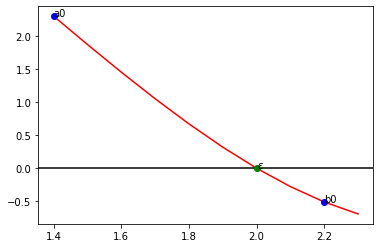

iter 4
a0: 1 , b0:  1.2
a: 1.0541263408994006 , b:  1.2
xk: 1.0541263408994006
fxk -1.8604573073233155e-06
dif 0.14588018926309387 



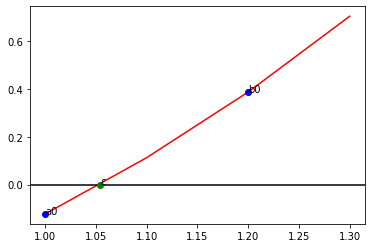

In [27]:
def falsePosition(a,b,f,E, withGraph=True):
    #valores iniciais
    a0 = a
    b0 = b

    #grafico
    if(withGraph):
        x = np.arange(a0,b0+0.1,0.1)
        y= f(x)
        plt.plot(x,y,'-r')
        #dots
        plt.plot(a0,f(a0),'ob')
        plt.text(a0,f(a0),"a0")

        plt.plot(b0,f(b0),'ob')
        plt.text(b0,f(b0),'b0')

        plt.axhline(y=0, color='k')



    xk = 0 #ponto falso
    fxk = 0 #função com xk como entrada
    dif = 0 #diferenca entre a e b
    iter = 0 #qtd de iteracoes

    #verificação f(a0)*f(b0) < 0
    if(f(a0)*f(b0)>=0):
        print('impossível')
        return



    #usar uma função lambda para achar o novo valor apartir de A e B passados
    getXk = lambda x,y: (x*f(y)-y*f(x))/(f(y)-f(x))
    xk = getXk(a,b)
    fxk= f(xk)
    dif = abs(a-b) 

    #definindo o intervalo de verificação
    if(xk*fxk < 0): #está do lado direito?
        a = xk
    else:
        b = xk
        
        

    while(abs(fxk) > E and abs(dif) > E and iter < 50 ):
        iter = iter + 1        
        xk = getXk(a,b)
        fxk= f(xk)
        dif = abs(a-b)

        if(xk*fxk < 0): #está do lado direito?
            a = xk
        else:
            b = xk
            
    print("==========\niter", iter)
    print("a0:", a0,", b0: ", b0)
    print("a:", a,", b: ", b)
    print("xk:", xk)
    print("fxk", fxk)
    print("dif", dif,"\n")

    if(withGraph):
        plt.plot(xk,fxk,'og')
        plt.text(xk,fxk,r'$\varepsilon$')
        plt.show()

falsePosition(-1,0.5,lambda x: 2*x**3 -4*x**2+3*x , 0.001)
falsePosition(-1,-0.1,lambda x: np.sin(x)+x**2 , 0.001)

falsePosition(1.4,2.2,lambda x: x**3 -4*x**2 + x+6 , 0.01)
falsePosition(1,1.2,lambda x: np.exp(x)-np.sin(x)-2 , 0.00001)


In [10]:
1.8604573073233155e-06 > 1e-05

False

In [21]:
np.arange(1,1.5, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4])